<a href="https://colab.research.google.com/github/essanfelix/7688581-Expert-Git-GitHub/blob/main/Cybersecurit_%C3%A9IA_D%C3%A9tection_de_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#1/Chargement et visualisation du dataset
import pandas as pd

# Charger les données
df = pd.read_csv('/content/spam.csv', encoding='latin-1')

# Afficher les premières lignes
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [29]:
#Vérification de la structure des colonnes et suppression
# Garder seulement les colonnes utiles
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Affichage des stats de base
df['label'].value_counts()


,count
label,
ham,4825
spam,747


In [30]:
#2/Prétraitement des données
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

# Transformer les labels en numériques
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Nettoyage de texte
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['cleaned'] = df['message'].apply(clean_text)

df.head()


,label,message,cleaned
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [33]:
#3/Tokenisation et séquencement
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer # Import Tokenizer from tensorflow.keras.preprocessing.text
from tensorflow.keras.preprocessing.sequence import pad_sequences # Import pad_sequences from tensorflow.keras.preprocessing.sequence

# Paramètres
MAX_VOCAB_SIZE = 5000
MAX_SEQUENCE_LENGTH = 100

# Tokenizer
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df['cleaned'])
sequences = tokenizer.texts_to_sequences(df['cleaned'])

# Padding
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Labels
y = df['label'].values

In [34]:
#4/Séparation des données
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
#5/Entraînement du modèle LSTM
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

EMBEDDING_DIM = 64

model = Sequential()
model.add(Embedding(MAX_VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Entraînement
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=64)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.8605 - loss: 0.4125 - val_accuracy: 0.9731 - val_loss: 0.1180
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.9772 - loss: 0.0901 - val_accuracy: 0.9812 - val_loss: 0.0694
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.9892 - loss: 0.0514 - val_accuracy: 0.9821 - val_loss: 0.0718
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.9951 - loss: 0.0241 - val_accuracy: 0.9722 - val_loss: 0.0889
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9958 - loss: 0.0186 - val_accuracy: 0.9830 - val_loss: 0.0625


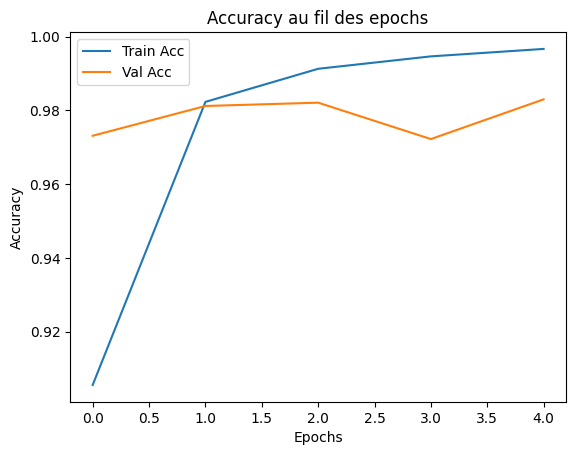

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9896 - loss: 0.0392
Accuracy finale sur le jeu de test : 0.9830


In [36]:
#6/Évaluation et visualisation des résultats
import matplotlib.pyplot as plt

# Courbes d’apprentissage
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy au fil des epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Évaluation finale
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy finale sur le jeu de test : {accuracy:.4f}")

